# The regular solution model

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/MatSciEd/Thermodynamics/blob/main/2.%20Binary%20Phasediagrams/1.%20Regular%20Solution%20Model.ipynb)

In this Notebook, we will put together tools to help us calculate the Gibbs free energy of materials and use the results to construct phase diagrams.

The first step is the regular solution model for the Gibbs free energy of mixing. The regular solution model makes two assumptions:
* The entropy of the alloy is given by ideal entropy of mixing
$$
\Delta S_\mathrm{mix} = -R \left [ x \ln x +(1−x) \ln(1−x) \right ]
$$
* The enthalpy of mixing follows a simple quadratic form
$$
\Delta H_\mathrm{mix}(x) = a_0 x (1 − x)
$$
where $a_0$ is a parameter describing the difference between the A–B interaction and the average of the A–A and B–B interactions.

The resulting Gibbs free energy of mixing is 
$$
\Delta G_\mathrm{mix}(x) = a_0 x (1 − x) + RT \left [ x \ln x +(1−x) \ln(1−x) \right ]
$$

If $a_0 >0$, the A and B atoms prefer to form A-A and B-B bonds instead of A-B bonds. As a consequence, there will be some compositions which are immiscible at lower temperatures. The critical temperature $T_c$ above which all compositions are miscible, is called the upper critical solution temperature (UCST),
$$
T_c = \frac{a_0}{2R},
$$

We will calculate the Gibbs free energy of the regular solution model for positive ($a_0>0$) and negative ($a_0<0$) departure from ideality. For the case of positive departure from ideality, we will calculate the boundary between the miscible and immiscible regions. This curve can be calculated analytically, but here we deduce it from the position of the minima in $\Delta G_{mix}$ as a function of temperature.

### Preliminaries
Import the units, numerical, and plotting packages.

In [1]:
# Import NumPy numerical package
import numpy as np

# Import SciPy
import scipy as scipy
from scipy.optimize import fsolve

# Install the pint package using pip in the current Jupyter kernel
# To use pint, restart the kernel
import sys
!{sys.executable} -m pip install pint

# Install the latest version of MatPlotLib, needed for Google Colab
!{sys.executable} -m pip install -U matplotlib

# Disable Pint's old fallback behavior (must come before importing Pint)
import os
os.environ['PINT_ARRAY_PROTOCOL_FALLBACK'] = "0"

# Import Pint for units in Python
from pint import UnitRegistry
u = UnitRegistry(auto_reduce_dimensions=True)
u.default_format = 'P'

# plotting package
import matplotlib.pyplot as plt
%pylab inline
matplotlib.rcParams.update({'font.size': 24, 'text.usetex': False})

Populating the interactive namespace from numpy and matplotlib


### Thermodynamic data
Set the thermodynamic constant and model parameters.

We use two regular solution models to illustrate how the Gibbs free energy, the activity, and activity coefficients depend on positive or negative departure from ideality.

**Question 1: What local order is prefered for positive departure from ideality?**

**Question 2: What consequences might a strong negative departure from ideality have on the stable phases of a materials system?**

In [2]:
# Gas constant
R = 8.314*u.J/u.mol/u.K

# Choice of temperature
T = 700*u.K

# Parameters for the regular solution models
#   Model 1: positive departure from ideality, a1>0
#   Model 2: negative departure from ideality, a2<0
a1 = +20*u.kJ/u.mol
a2 = -20*u.kJ/u.mol

# Return the enthalpy for a regular solution
def get_H_rs(T, a, x):
    H_rs = a * x * (1-x)
    return H_rs

# Return the Gibbs free energy of mixing for a regular solution
def get_G_rs(T, a, x):
    G_rs = a * x * (1-x) + R * T * (x * np.log(x) + (1-x)*np.log(1-x))
    return G_rs

### Calculate the enthalpy, entropy contribution, Gibbs free energy, and activities

In [3]:
# Array of compositions from 0 to 1
xv = np.linspace(0.0001,0.9999,500)

# Enthalpies of mixing
H1 = get_H_rs(T, a1, xv)
H2 = get_H_rs(T, a2, xv)

# Ideal entropy of mixing
S = -R * (xv * np.log(xv) + (1-xv)*np.log(1-xv))
TS = T*S

# Gibbs free energy of mixing
G1 = H1 - TS
G2 = H2 - TS

# Activities and activity coefficients
aA1=(1-xv)*np.exp(a1*xv*xv/R/T)
aA2=(1-xv)*np.exp(a2*xv*xv/R/T)

aB1=xv*np.exp(a1*(1-xv)*(1-xv)/R/T)
aB2=xv*np.exp(a2*(1-xv)*(1-xv)/R/T)

### Plot the enthalpy, entropy contribution, Gibbs free energy, and activities

**Question 3: How do changes of the temperature and the parameter $a_0$ for the regular solution model affect the activity and Henry's activity coefficient, $\gamma_B^0$?**

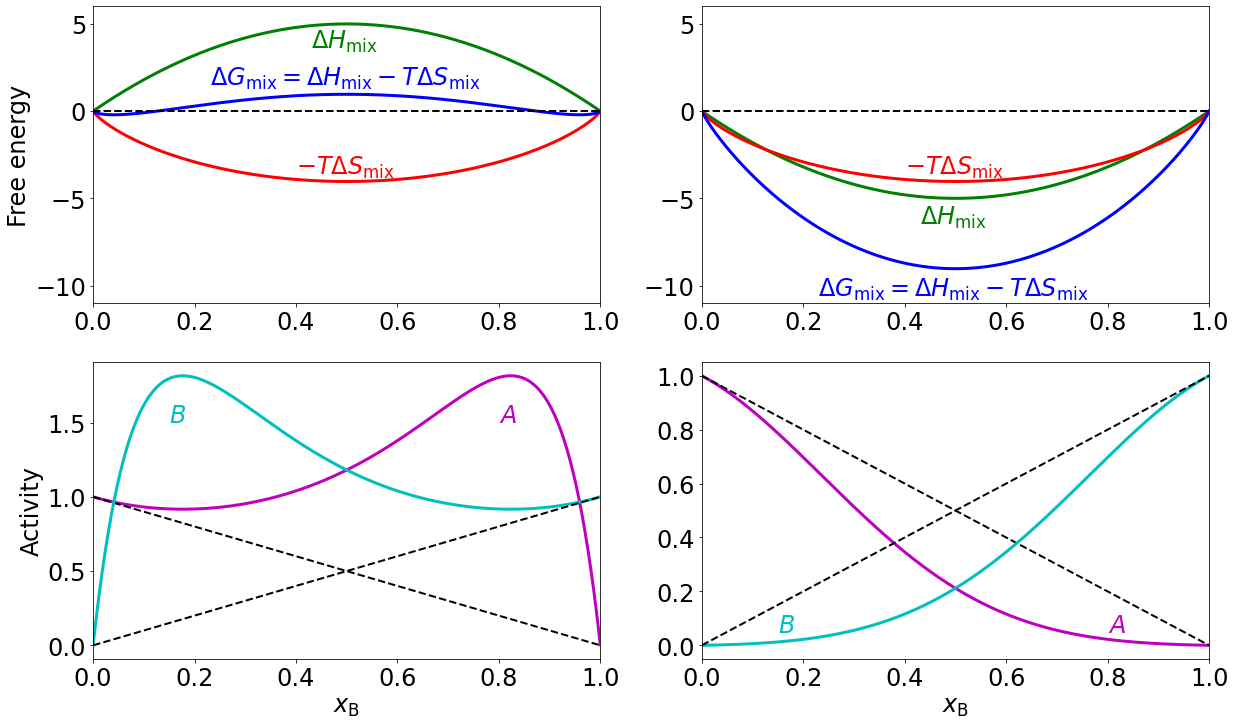

In [4]:
# Plot enthalpy and Gibbs free energy of mixing for both phases
fig, ax = plt.subplots(2, 2, figsize=(20,12))
#fig.tight_layout()

ax[0,0].plot(xv, (H1/(u.kJ/u.mol)).magnitude, 'g-', linewidth=3.0)
ax[0,0].plot(xv, (-TS/(u.kJ/u.mol)).magnitude, 'r-', linewidth=3.0)
ax[0,0].plot(xv, (G1/(u.kJ/u.mol)).magnitude, 'b-', linewidth=3.0)
ax[0,0].plot([0, 1], [0, 0], 'k--', linewidth=2.0)

ax[0,0].annotate('$\Delta H_\mathrm{mix}$', xy=(0.43,3.6), color='g', xycoords='data')
ax[0,0].annotate('$\Delta G_\mathrm{mix} = \Delta H_\mathrm{mix} - T\Delta S_\mathrm{mix}$', xy=(0.23,+1.5), color='b', xycoords='data')
ax[0,0].annotate('$- T\Delta S_\mathrm{mix}$', xy=(0.4,-3.6), color='r', xycoords='data')

ax[0,0].set_xlim([0, 1])
ax[0,0].set_ylim([-11, 6])
ax[0,0].set_ylabel('Free energy')

ax[0,1].plot(xv, (H2/(u.kJ/u.mol)).magnitude, 'g-', linewidth=3.0)
ax[0,1].plot(xv, (-TS/(u.kJ/u.mol)).magnitude, 'r-', linewidth=3.0)
ax[0,1].plot(xv, (G2/(u.kJ/u.mol)).magnitude, 'b-', linewidth=3.0)
ax[0,1].plot([0, 1], [0, 0], 'k--', linewidth=2.0)

ax[0,1].annotate('$\Delta H_\mathrm{mix}$', xy=(0.43,-6.5), color='g', xycoords='data')
ax[0,1].annotate('$\Delta G_\mathrm{mix} = \Delta H_\mathrm{mix} - T\Delta S_\mathrm{mix}$', xy=(0.23,-10.6), color='b', xycoords='data')
ax[0,1].annotate('$- T\Delta S_\mathrm{mix}$', xy=(0.4,-3.6), color='r', xycoords='data')

ax[0,1].sharex(ax[0, 0])
ax[0,1].sharey(ax[0, 0])

ax[1,0].plot(xv, aA1.magnitude, 'm-', linewidth=3.0)
ax[1,0].plot(xv, 1-xv, 'k--', linewidth=2.0)
ax[1,0].plot(xv, aB1.magnitude, 'c-', linewidth=3.0)
ax[1,0].plot(xv, xv, 'k--', linewidth=2.0)
ax[1,0].annotate('$A$', xy=(0.8,1.5), color='m', xycoords='data')
ax[1,0].annotate('$B$', xy=(0.15,1.5), color='c', xycoords='data')
ax[1,0].sharex(ax[0, 0])
ax[1,0].set_xlabel('$x_\mathrm{B}$')
ax[1,0].set_ylabel('Activity')

ax[1,1].plot(xv, aA2.magnitude, 'm-', linewidth=3.0)
ax[1,1].plot(xv, 1-xv, 'k--', linewidth=2.0)
ax[1,1].plot(xv, aB2.magnitude, 'c-', linewidth=3.0)
ax[1,1].plot(xv, xv, 'k--', linewidth=2.0)
ax[1,1].annotate('$A$', xy=(0.8,0.05), color='m', xycoords='data')
ax[1,1].annotate('$B$', xy=(0.15,0.05), color='c', xycoords='data')
ax[1,1].sharex(ax[0, 0])
ax[1,1].set_xlabel('$x_\mathrm{B}$')

plt.show()

### Temperature dependence of the Gibbs free energy for positive departure from ideality

**Question 4: Using the plot for the Gibbs free enery $G(x_B, T)$ to estimate the critical temperature above which the regular solution model shows complete miscibility.**

Critical temperature =  1202.7904738994466 kelvin


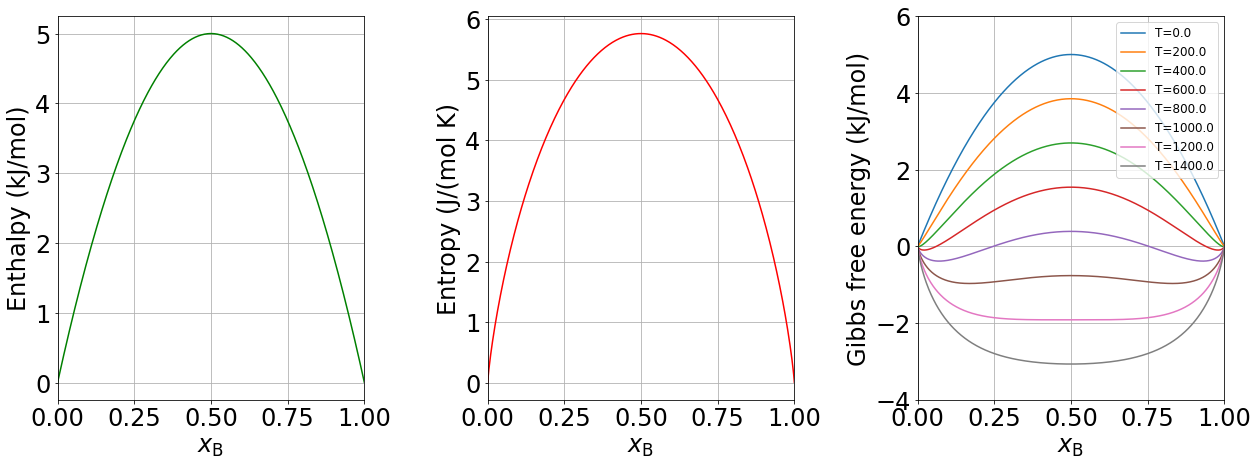

In [5]:
# Create a panel of three figures to show the enthalpy, entropy, and Gibbs free energy
fig, ax = plt.subplots(1, 3, figsize=(18,7))

# Plot the enthalpy
ax[0].plot(xv, (H1/(u.kJ/u.mol)).magnitude, 'g-')
ax[0].set_xlabel('$x_\mathrm{B}$')
ax[0].set_ylabel('Enthalpy (kJ/mol)')
ax[0].set_xlim(0, 1) 
ax[0].grid() 

# Plot the entropy
ax[1].plot(xv, (S/(u.J/u.mol/u.K)).magnitude, 'r-')
ax[1].set_xlabel('$x_\mathrm{B}$')
ax[1].set_ylabel('Entropy (J/(mol K)')
ax[1].set_xlim(0, 1) 
ax[1].grid() 

# Critical temperture of the regular solution model
Tc = a1/2/R
print('Critical temperature = ', Tc)

# Range of temperatures from zero to the critical temperature
Tmin = 0
Tmax = np.around((Tc/u.K).magnitude+200, decimals = -2)
Tsteps = (np.around(Tmax-Tmin)/200+1).astype(int)
tv = np.linspace(Tmin, Tmax, Tsteps)

# Plot Gibbs free energy as a function of temperature
ax[2].set_xlim(0, 1) 
ax[2].set_ylim(-4, 6) 

for t in np.nditer(tv):
    H1 = get_H_rs(t, a1, xv)
    G1 = H1 - t*u.K*S
    ax[2].plot(xv, (G1/(u.kJ/u.mol)).magnitude, label=(r'T='+ str(t)))

ax[2].set_xlabel('$x_\mathrm{B}$')
ax[2].set_ylabel('Gibbs free energy (kJ/mol)')
ax[2].legend(prop={'size': 12}) 
ax[2].grid() 
fig.tight_layout()
plt.show() 

### Calculate the miscibility gap

**Question 5: What simplification do we use to calculate the common tangent for the regular solution model?**

**Question 6: How close is your estimate of the critical temperature to the calculated value?**

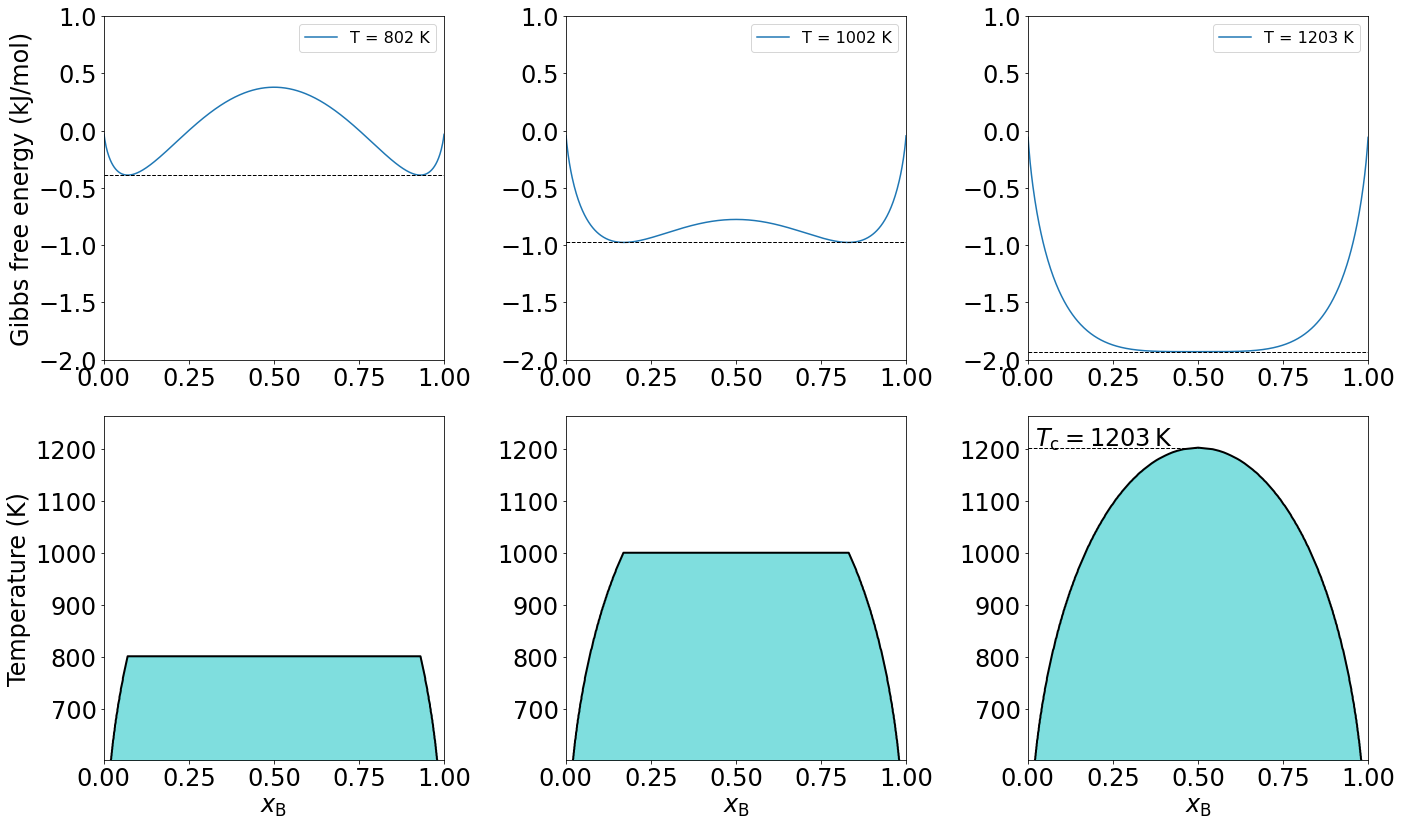

In [6]:
# Create a range of temperatures from half to one times the critical temperature
Num_T = 200
tv = np.linspace((Tc/u.K).magnitude/2, (Tc/u.K).magnitude, Num_T)
boundary = np.zeros(Num_T)

xv = np.linspace(0.0001,0.5,500)

fig, ax = plt.subplots(2, 3, figsize=(20,12))
for i, axis in enumerate(ax.flat):
    axis.set_xlim(0, 1) 
    if(i>2):
        axis.set_ylim((Tc/u.K).magnitude/2, (Tc/u.K).magnitude*1.05)
        axis.set_xlabel('$x_\mathrm{B}$')
    else:
        axis.set_ylim(-2,1)

# Calculate the common tangent using the fact that the regular solution model is symmetric.
# We just have to minimize G in the left and right half of the composition space.
S = -R * (xv * np.log(xv) + (1-xv)*np.log(1-xv))
i = 0
for t in np.nditer(tv):
    G1 = get_G_rs(t*u.K, a1, xv)
    boundary[i] = xv[np.argmin(G1)]
    i=i+1

xboundary, yboundary = np.hstack((boundary, 1-boundary[::-1])), np.hstack((tv, tv[::-1]))
ax[1,2].plot(xboundary, yboundary, 'k-', lw=2)
ax[1,2].fill_between(xboundary, yboundary, color='c', alpha=0.5)
ax[1,2].text(0.02, (Tc/u.K).magnitude+2, r'$T_\mathrm{{c}} = {:.0f}\,\mathrm{{K}}$'.format((Tc/u.K).magnitude))
ax[1,2].plot([0,0.5],[(Tc/u.K).magnitude, (Tc/u.K).magnitude], 'k--', lw=1)

t = round((Tc/u.K).magnitude)
xv = np.linspace(0.001,0.999,500)
G1 = get_G_rs(Tc, a1, xv)
ax[0,2].plot(xv, (G1/(u.kJ/u.mol)).magnitude, label=(r'T = '+ str(t)+' K'))
ax[0,2].plot([0,1],[np.amin((G1/(u.kJ/u.mol)).magnitude), np.amin((G1/(u.kJ/u.mol)).magnitude)], 'k--', lw=1)
ax[0,2].legend(prop={'size': 16}) 


# Plot Gibbs free energy and phase diagram for 5/6 of Tc
t = round((Tc/u.K).magnitude*5/6)
G1 = get_G_rs(Tc*5/6, a1, xv)
ax[0,1].plot(xv, (G1/(u.kJ/u.mol)).magnitude, label=(r'T = '+ str(t)+' K'))
ax[0,1].plot([0,1],[np.amin((G1/(u.kJ/u.mol)).magnitude), np.amin((G1/(u.kJ/u.mol)).magnitude)], 'k--', lw=1)
ax[0,1].legend(prop={'size': 16}) 

# Data below T
xboundary=xboundary[yboundary<t]
yboundary=yboundary[yboundary<t]
ax[1,1].plot(xboundary, yboundary, 'k-', lw=2)
ax[1,1].fill_between(xboundary, yboundary, color='c', alpha=0.5)


# Plot Gibbs free energy and phase diagram for 2/3 of Tc
t = round((Tc/u.K).magnitude*2/3)
G1 = get_G_rs(Tc*2/3, a1, xv)
ax[0,0].plot(xv, (G1/(u.kJ/u.mol)).magnitude, label=(r'T = '+ str(t)+' K'))
ax[0,0].plot([0,1],[np.amin((G1/(u.kJ/u.mol)).magnitude), np.amin((G1/(u.kJ/u.mol)).magnitude)], 'k--', lw=1)
ax[0,0].legend(prop={'size': 16}) 

# Data below T
xboundary=xboundary[yboundary<t]
yboundary=yboundary[yboundary<t]
ax[1,0].plot(xboundary, yboundary, 'k-', lw=2)
ax[1,0].fill_between(xboundary, yboundary, color='c', alpha=0.5)


#ax[1,2].set_xlabel('$x_\mathrm{B}$')
ax[0,0].set_ylabel('Gibbs free energy (kJ/mol)')
ax[1,0].set_ylabel('Temperature (K)')
fig.tight_layout()
plt.show() 